In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot

In [43]:
class SGD:
    def __init__(self, epochs, eta, regularization):
        self.epochs = epochs
        self.eta = eta
        self.regularization = regularization
        self.w = np.random.randn()
        self.b = np.random.randn()

    def mse(self, y_true, y_pred):
            return np.mean(np.square(y_true - y_pred))
        
    def fit(self, X, Y): 
        n = len(X)
        indexes = np.asarray([i for i in range(len(X))])
        for _ in range(self.epochs):
            np.random.shuffle(indexes)
            w_gradient = 0
            b_gradient = 0
            for j in range(n):
                i = indexes[j]
                y_hat = self.w * X[i] + self.b
                #print(prediction)                
                w_gradient = (y_hat - self.w*X[i] - self.b)*(-X[i]) + self.regularization*self.w
                b_gradient = (y_hat - self.w*X[i] - self.b) + self.regularization*self.w
                        
                self.w = self.w - self.eta*w_gradient
                self.b = self.b - self.eta*b_gradient
                        
                
    def predict(self, X):
        y_pred=[]
        for i in range(len(X)):
            prediction = self.w * X[i] + self.b
            y_pred.append(prediction)
        return np.array(y_pred)


In [44]:
def preprocessing():
    data = pd.read_csv('data.csv')
    X, Y = np.asarray(data.iloc[:,0]), np.asarray(data.iloc[:,1])
    #X, Y = data.iloc[:,0], data.iloc[:,1]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    return X_train, Y_train, X_test, Y_test

In [45]:
if __name__ == '__main__':    
    #rand
    np.random.seed(10)
    x_train, y_train, x_test, y_test = preprocessing() 
    model = SGD(epochs=100, eta=0.001, regularization = 0.0001)
    model.fit(x_train, y_train)

In [46]:
y_pred = model.predict(x_test)
mse = model.mse(y_test, y_pred)
print('MSE =', mse)

MSE = 95.62154159757947


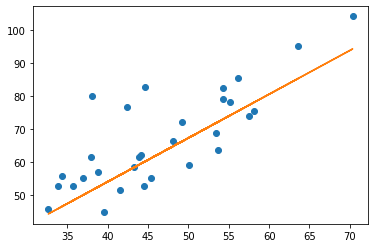

In [47]:
plot(x_test, y_test, 'o')
m, b = np.polyfit(x_test, y_pred, 1)
plot(x_test, m*x_test + b)